# Question 3
## Part A
First we import the required libraries and our custom neural network implementation from the `custom_neural_network.py` file in the `implementation` folder which contains a bare neural network implementation with configurable layer architectures.

In [4]:
import pandas as pd
from matplotlib import pyplot as plt
from implementation.activation_functions import *
from implementation.custom_neural_network import NeuralNetwork

%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10

### Initializing the neural network
We initialize the neural network's architecture for layers as described in the question.

In [5]:
hidden_layers_arch = [
    {'count': 8, 'activation': tanh, 'activation_derivation': tanh_derivation},
    {'count': 5, 'activation': tanh, 'activation_derivation': tanh_derivation}
]
output_layer = {'count': 3, 'activation': softmax, 'activation_derivation': softmax_derivation}
network = NeuralNetwork(input_features_count=13, hidden_layers_arch=hidden_layers_arch, output_layer=output_layer)

### Reading the data
We read the `drinks.csv` data file using `pandas#read_csv` function, shuffle its rows and divide it to features and targets `numpy.ndarray`s.

In [6]:
drinks_df = pd.read_csv('../Data/drinks.csv')
drinks_df = drinks_df.sample(frac=1).reset_index(drop=True)
drinks_features = drinks_df.values[:, :13]
drinks_targets = drinks_df.values[:, 13:]

### Training the network
Then we train the network using the first 120 datapoints in the dataset and test its performance on the remaining datapoints. For calculating the accuracy of the network, we use `sklearn.metrics#accuracy_score` method by comparing the network's predicted targets vs the original corresponding targets from the dataset.
We repeat the training process with different epoches and plot the errors as a function of epoches for training the network using backpropagation algorithm.

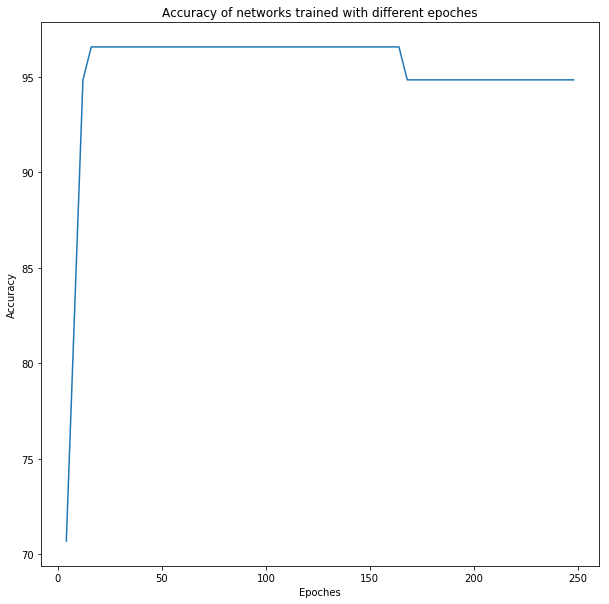

In [7]:
from sklearn import metrics

errors = []
seed = np.random.rand(100, 100)
epoches = np.arange(4, 250, 4)
for epoch in epoches:
    network.train_network(drinks_features[:120, :], drinks_targets[:120, :], learning_rate=.7, iter=epoch, seed=seed)
    predictions = network.predict(drinks_features[120:])
    errors.append(metrics.accuracy_score(predictions, drinks_targets[120:, :]) * 100)
    
plt.plot(epoches, errors)
plt.title('Accuracy of networks trained with different epoches')
plt.xlabel('Epoches')
plt.ylabel('Accuracy')
plt.show()

## Part B
### Using sklearn.neural_network
We use `sklearn.neural_network` package's `MLPClassifier` as a library class for training neural networks. We initialize the network's architecture, set the regularization parameter to zero to make it equal to the handmade neural network. Then we use the same epoch numbers to calculate errors in the same way as above and plot them in below figure.

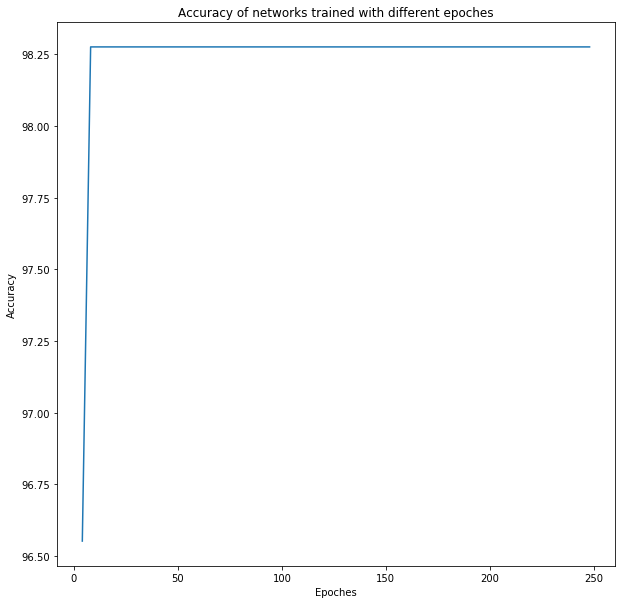

In [8]:
from sklearn.neural_network import MLPClassifier

errors = []
seed = np.random.rand(100, 100)
epoches = np.arange(4, 250, 4)
for epoch in epoches:
    classifier = MLPClassifier(hidden_layer_sizes=(8, 5), activation='tanh', 
                               max_iter=epoch, solver='lbfgs', alpha=0.0, learning_rate_init=.7, random_state=10)
    classifier.fit(drinks_features[:120, :], drinks_targets[:120, :])
    predictions = classifier.predict(drinks_features[120:])
    errors.append(metrics.accuracy_score(predictions, drinks_targets[120:, :]) * 100)
    
plt.plot(epoches, errors)
plt.title('Accuracy of networks trained with different epoches')
plt.xlabel('Epoches')
plt.ylabel('Accuracy')
plt.show()